<h2>Quandl-esimerkkejä</h2>

https://www.quandl.com/ on hyvä esimerkki palvelusta, joka tarjoaa aikasarjoja valmiiksi käyttökelpoisessa muodossa. Osa aikasarjoista on ilmaiseksi käytettävissä, osa taas maksullisia. Ilmaistenkin aikasarjojen käyttämiseksi sinun pitää rekisteröityä palvelun käyttäjäksi.

Quandl tarjoaa kunkin aikasarjan kohdalla valmiin Python-komennon aikasarjan lataamiseksi. Voit kopioida ja liittää komennon koodiisi.

Aina suorittaessasi koodin saat käyttöösi tuoreimmat tiedot aikasarjasta.

<b>Tämän notebookin koodit eivät toimi ilman henkilökohtaista api_key-tunnusta!</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import quandl #toimii, jos quandl on asennettu
quandl.ApiConfig.api_key = '???' #tähän tarvitaan oma henkilökohtainen API-key

<h3>Öljyn hinta</h3>

Esimerkiksi öljyn hinnat löydät rekisteröityneenä käyttäjänä osoitteesta https://www.quandl.com/data/OPEC/ORB

In [2]:
#Öljyn hinta:
oil= quandl.get("OPEC/ORB")
oil.head()

,Value
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86


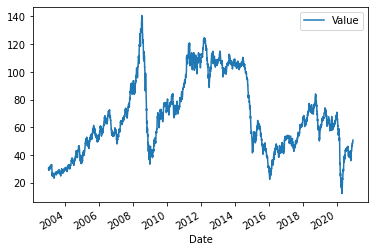

In [3]:
#Öljyn hintakehitys kuviona:
oil.plot()

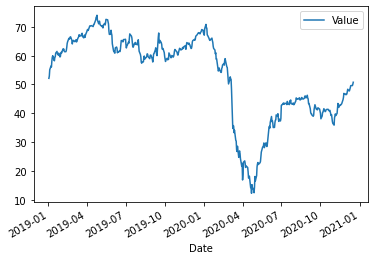

In [4]:
#Öljyn hintakehitys viime aikoina:
oil['2019':].plot()

<h3>Metallien hintoja</h3>

Palladiumin hinnat osoitteessa https://www.quandl.com/data/LPPM/PALL<br>
Platinan hinnat osoitteessa https://www.quandl.com/data/LPPM/PLAT

In [5]:
pall=quandl.get("LPPM/PALL")
pall.head()

,USD AM,EUR AM,GBP AM,USD PM,EUR PM,GBP PM
Date,,,,,,
1990-04-02,128.00,NaN,78.70,127.65,NaN,78.55
1990-04-03,128.35,NaN,78.60,128.50,NaN,78.75
1990-04-04,128.35,NaN,78.25,128.00,NaN,77.90
1990-04-05,128.40,NaN,78.00,127.75,NaN,77.65
1990-04-06,128.75,NaN,78.45,128.50,NaN,78.40


In [6]:
plat=quandl.get("LPPM/PLAT")
plat.head()

,USD AM,EUR AM,GBP AM,USD PM,EUR PM,GBP PM
Date,,,,,,
1990-04-02,471.00,NaN,289.65,470.50,NaN,NaN
1990-04-03,475.80,NaN,291.35,477.25,NaN,NaN
1990-04-04,475.70,NaN,289.95,476.75,NaN,NaN
1990-04-05,481.75,NaN,292.60,481.85,NaN,NaN
1990-04-06,481.00,NaN,293.10,480.25,NaN,NaN


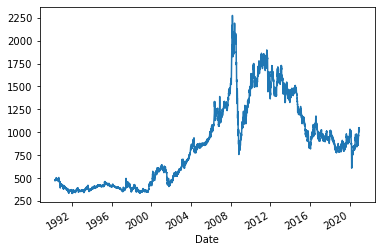

In [7]:
plat['USD AM'].plot()

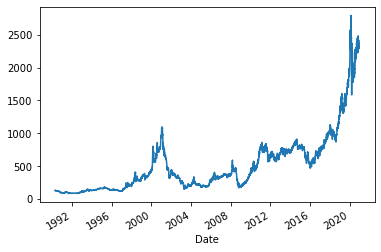

In [8]:
pall['USD AM'].plot()

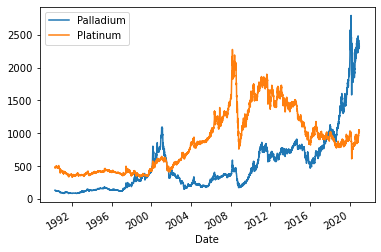

In [9]:
#Palladiumin ja platinan EUR_AM hinnat samaan dataframeen:
pall_plat=pd.concat([pall['USD AM'], plat['USD AM']], axis=1)

pall_plat.columns=['Palladium', 'Platinum']

pall_plat.plot()

<h3>Osakkeiden hintoja</h3>

In [10]:
microsoft=quandl.get("EOD/MSFT")
microsoft.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.07,31.29,31.880,154507000.0,0.0,1.0,27.344779,27.620379,26.948602,27.456741,154507000.0
2013-09-04,31.3900,31.47,31.11,31.195,142320600.0,0.0,1.0,27.034727,27.103628,26.793577,26.866783,142320600.0
2013-09-05,31.1000,31.44,30.95,31.235,71644900.0,0.0,1.0,26.784964,27.077790,26.655776,26.901233,71644900.0
2013-09-06,31.3100,31.39,31.13,31.152,75434900.0,0.0,1.0,26.965827,27.034727,26.810802,26.829749,75434900.0
2013-09-09,31.2208,31.79,31.20,31.655,49628500.0,0.0,1.0,26.889004,27.379229,26.871089,27.262960,49628500.0


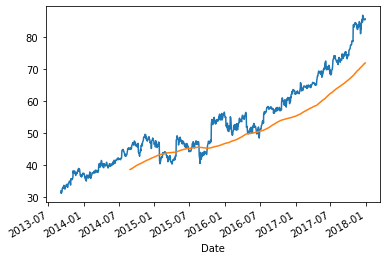

In [11]:
microsoft['Close'].plot()

#Liukuva keskiarvo:
microsoft['Close'].rolling(250).mean().plot()

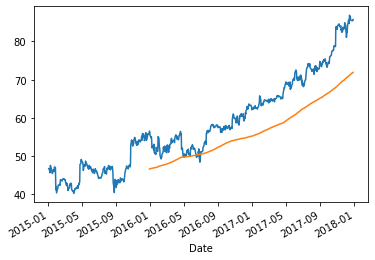

In [12]:
#Vuoden 2015 alusta:
microsoft['Close']['2015':].plot()

microsoft['Close']['2015':].rolling(250).mean().plot()

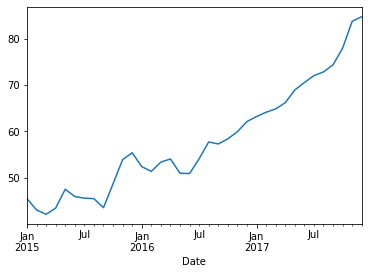

In [13]:
#Kuukausikeskiarvot:
microsoft['Close']['2015':].resample('BM').mean().plot()

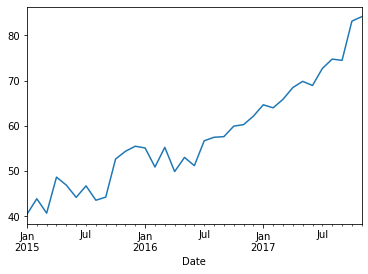

In [14]:
#Kuukauden viimeisen päivän hinnat:
microsoft['Close']['2015':].asfreq('BM').plot()

In [15]:
#Applen osake samaan dataframeen Microsoftin kanssa:
apple=quandl.get("EOD/AAPL")

mi_ap=pd.concat([microsoft['Close']['2015':], apple['Close']['2015':]], axis=1)

mi_ap.columns=['Microsoft', 'Apple']

mi_ap.head()

,Microsoft,Apple
Date,,
2015-01-02,46.760,109.33
2015-01-05,46.325,106.25
2015-01-06,45.650,106.26
2015-01-07,46.230,107.75
2015-01-08,47.590,111.89


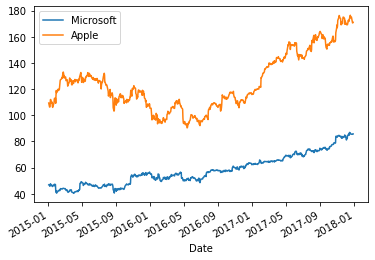

In [16]:
mi_ap.plot()

In [17]:
#Muutosprosentit
mi_ap['mic muutos']=mi_ap['Microsoft'].pct_change()
mi_ap['app muutos']=mi_ap['Apple'].pct_change()
mi_ap.head()

,Microsoft,Apple,mic muutos,app muutos
Date,,,,
2015-01-02,46.760,109.33,NaN,NaN
2015-01-05,46.325,106.25,-0.009303,-0.028172
2015-01-06,45.650,106.26,-0.014571,0.000094
2015-01-07,46.230,107.75,0.012705,0.014022
2015-01-08,47.590,111.89,0.029418,0.038422


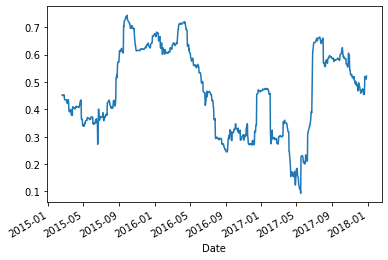

In [18]:
#Liukuva korrelaatio Microsoftin ja Applen muutosprosenteille:
corr=mi_ap['mic muutos'].rolling(100, min_periods=30).corr(mi_ap['app muutos'])
corr.plot()

In [19]:
#Pitkän aikavälin korrelaatio:
mi_ap[['mic muutos','app muutos']].corr()

,mic muutos,app muutos
mic muutos,1.00000,0.49534
app muutos,0.49534,1.00000


<h3>Aikasarjojen tallentaminen Exceliin</h3>

In [20]:
walt_disney=quandl.get("EOD/DIS")

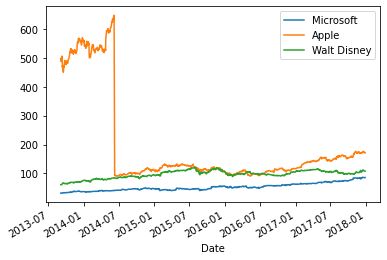

In [21]:
#Yhdistän kolmen osakkeen tiedot samaan dataframeen:
mi_ap_wa=pd.concat([microsoft['Close'], apple['Close'], walt_disney['Close']], axis=1)

mi_ap_wa.columns=['Microsoft', 'Apple', 'Walt Disney']

mi_ap_wa.plot()

In [22]:
#Exceliin:
writer = pd.ExcelWriter('mi_ap_wp.xlsx', engine='xlsxwriter')
mi_ap_wa.to_excel(writer, sheet_name = 'aikasarjat')
writer.save()